Hello! In this post I will teach you how to do a simple data classification using the KMeans algorithm. We will go through the concept of Kmeans first, and then dive into the Python code used to perform the classification.

## What is KMeans algorithm?

Kmeans is a **classifier** algorithm. This means that it can attribute labels to data by identifying certain (hidden) patterns on it. It is also am **unsupervised** learning algorithm. It applies the labels without having a target, i.e a previously known label. Therefore, at the end of the training, it is up to the human behind the machine to understand what does the labels attributed mean and how this information can be interpreted.

### KMeans algorithm

KMeans performs data clustering by separating it into groups. Each group is clearly separated and do not overlap. A set of data points is said to belong to a group depending on its distance a point called the centroid.

A centroid consists in a point, with the same dimension is the data (1D, 2D, 3D, etc). It is placed on the center of the cluster, thus being called a centroid. 

To exemplify, consider a point $x$ which we want to classify as label "banana", "apple" or "orange". KMeans works by measuring the distance of the point $x$ to the centroids of each cluster "banana", "apple" or "orange". Let's say these distances are b1 (distance from $x$ to "banana" centroid), a1 (distance from $x$ to "apple" centroid) and o1 (distance from $x$ to "orange" centroid). If a1 is the smallest distance, then Kmeans says that $x$ belongs to "apple". On the other hand, if b1 is the smallest, then $x$ belongs to "banana", and so on.

The distance we refer here can be measured in different forms. A very simple way, and very popular is the **Euclidean Distance**. In a 2D space, the Euclidean distance between a point at coordinates (x1,y1) and another point at (x2,y2) is:

$$
d = \sqrt{(x_1-x_2)^2 + (y_1 - y_2)^2}
$$

Similarly, in a 3D space, the distance between point (x1,y1,z1) and point (x2,y2,z2) is:

$$
d = \sqrt{(x_1-x_2)^2 + (y_1 - y_2)^2 + (z_1 - z_2)^2}
$$

Before going through how the training is done, let's being to code our problem.

## Using Python to code KMeans algorithm

The Python libraries that we will use are:
- numpy -> for numerical computations;
- matplotlib -> for data visualization

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In this exercise we will work with an hypothetical dataset generated using random values. The distinction between the groups are made by shifting the first part of the dataset a bit higher in the feature space, while shifting the second part a bit lower. This will create two more or less distinguishible groups.

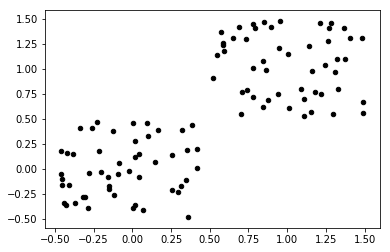

In [38]:
X= -0.5 + np.random.rand(100,2)
X1 = 0.5 + np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 20, c = 'k')

Now we place the centroids randomly in the feature space above (2D), by using the `rand()` function from Numpy.

In [39]:
centroids = np.random.rand(2,2)
centroids

array([[0.38479822, 0.86872748],
       [0.43462575, 0.45074992]])

Let's visualize the dataset and the centroids in the same plot. Notice that the randomly positioning of the centroids initially did not put them in the center of the spac, but a bit shifted to the left. This is not a big problem, since we will train the KMeans algorithm to correctly place the centroids to have a meaningful classification.

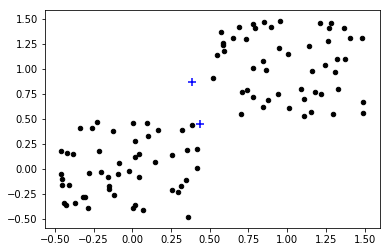

In [40]:
plt.scatter(X[ : , 0], X[ :, 1], s = 20, c = 'k')
plt.scatter(centroids[:,0],centroids[:,1],s = 50, c = 'b',marker = '+')

Using the function `np.linalg.norm()` from numpy we can calculate the Euclidean distance from each point to each centroid. For instance, the following code is used to calculate the distances from all the points stored in the variable $X$ to the first centroid. Then we print the first 10 distances.

In [41]:
dist = np.linalg.norm(X - centroids[0,:],axis=1).reshape(-1,1)
dist[:10,:]

array([[1.30319303],
       [0.49796268],
       [1.46371977],
       [1.28519675],
       [0.85744771],
       [1.03826401],
       [1.32784797],
       [1.07535536],
       [1.31616949],
       [0.48383236]])

Now we add the distance from all the points to the second centroid to the variable `dist` defined above. This will give as a matrix with N rows and 2 columns, where each row refers to one point of $X$, and each column is the distance value from one point to one of the centroids.

In [42]:
dist = np.append(dist,np.linalg.norm(X - centroids[1,:],axis=1).reshape(-1,1),axis=1)
dist[:10,:]

array([[1.30319303, 1.04360221],
       [0.49796268, 0.33991696],
       [1.46371977, 1.18050389],
       [1.28519675, 0.91427689],
       [0.85744771, 0.43937038],
       [1.03826401, 0.72856256],
       [1.32784797, 1.0784766 ],
       [1.07535536, 0.79980759],
       [1.31616949, 0.94513238],
       [0.48383236, 0.12764052]])

### How to train KMeans algorithm?

The training is done by repeating the following algorithm, until convergence:
- Find the distance of each point to each cluster;
- Attribute each point to a cluster by finding the minimum distance;
- Update the position of each centroid by placing it at the average position of the cluster, according the point belonging to that cluster. This can be interpreted mathematically as:

$$
c_j = \frac{1}{n}\sum x_j
$$

Where $n$ is the number of points belonging to to the cluster $j$ and $c_j$ are the coordinates of the centroid of cluster $j$. $x_j$ are the points belonging to cluster $j$.

- Check if the centroid position is almost the same as in the previous iteration. If yes, then assume convergence. Otherwise, repeat the steps.

### Implementing the Kmeans training algorithm

First we attribute each point of $X$ to a cluster by using the `np.argmin()` function, which will tell which column of `dist` is the lowest one, thus returning 0 (for the first cluster) or 1 (second cluster).

In [43]:
classes = np.argmin(dist,axis=1)
classes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0])

Visualize how the points are being currently classified.

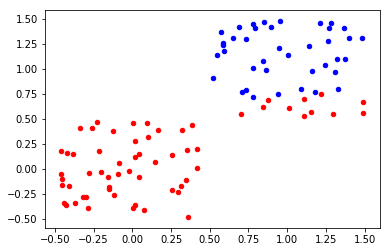

In [44]:
plt.scatter(X[classes == 0, 0], X[classes == 0, 1], s = 20, c = 'b')
plt.scatter(X[classes == 1, 0], X[classes == 1, 1], s = 20, c = 'r')

Now we update the position of each centroid, by calculating it at the mean position of the cluster. For instance, if a certain point has the points (1,0), (2,1) and (0.5,0.5), then the updated position of the centroid is:

$$
c_j = ((1 + 2 + 0.5)/3, (0 + 1 + 0.5)/3)
$$

In [45]:
# update position
for class_ in set(classes):
    centroids[class_,:] = np.mean(X[classes == class_,:],axis=0)
centroids

array([[0.96875375, 1.16083158],
       [0.14974282, 0.11498078]])

To understand what is happening here, let's visualize the dataset with the updated positioning of the centroids.

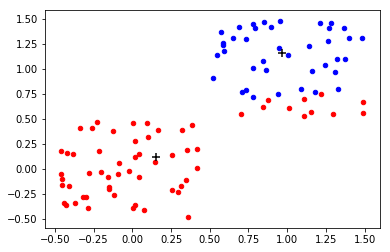

In [46]:
plt.scatter(X[classes == 0, 0], X[classes == 0, 1], s = 20, c = 'b')
plt.scatter(X[classes == 1, 0], X[classes == 1, 1], s = 20, c = 'r')
plt.scatter(centroids[:,0],centroids[:,1],s = 50, c = 'k',marker = '+')

Then the complete training consists of running the same update over and over again, until the positions of the centroid stop changing significantly. In the following code, we define a class `KMeans` aggregating all the code explained above and runnign the training until convergence. The initialization consists in settinga a number `k` of classes. Then the method `train()` performs the training over a dataset, while the method `predict()` labels a new point according the positioning of the centroids stored in the object.

In [0]:
class KMeans:
    def __init__(self,k):
        self.k = k

    def train(self,X,MAXITER = 100, TOL = 1e-3):
        centroids = np.random.rand(self.k,X.shape[1])
        centroidsold = centroids.copy()
        for iter_ in range(MAXITER):
            dist = np.linalg.norm(X - centroids[0,:],axis=1).reshape(-1,1)
            for class_ in range(1,self.k):
                dist = np.append(dist,np.linalg.norm(X - centroids[class_,:],axis=1).reshape(-1,1),axis=1)
            classes = np.argmin(dist,axis=1)
            # update position
            for class_ in set(classes):
                centroids[class_,:] = np.mean(X[classes == class_,:],axis=0)
            if np.linalg.norm(centroids - centroidsold) < TOL:
                break
                print('Centroid converged')
        self.centroids = centroids
    
    def predict(self,X):
        dist = np.linalg.norm(X - self.centroids[0,:],axis=1).reshape(-1,1)
        for class_ in range(1,self.k):
            dist = np.append(dist,np.linalg.norm(X - self.centroids[class_,:],axis=1).reshape(-1,1),axis=1)
        classes = np.argmin(dist,axis=1)
        return classes

Let's test our class by defining a KMeans classified with two centroids (k=2) and training in dataset $X$, as it was done step-by-step above.

In [0]:
kmeans = KMeans(2)
kmeans.train(X)

Check how each point of $X$ is being classified after complete training by using the `predict()` method we implemented above. Each poitn will be attributed to cluster 0 or cluster 1.

In [49]:
classes = kmeans.predict(X)
classes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Let's create a visualization of the final result, showing different colors for each cluster and the final position of the clusters (crosses in the plot).

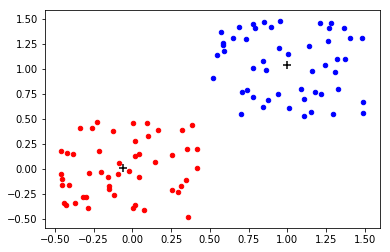

In [50]:
plt.scatter(X[classes == 0, 0], X[classes == 0, 1], s = 20, c = 'b')
plt.scatter(X[classes == 1, 0], X[classes == 1, 1], s = 20, c = 'r')
plt.scatter(kmeans.centroids[:,0],kmeans.centroids[:,1],s = 50, c = 'k',marker = '+')

Notice that it converged to a meaningful classification. The centroid is placed in the average position of each part of the dataset initially created, whith clear separation between each class.

For illustrative purposes, check how the same algorithm can work on a higher-dimensional problem with no modification of code.

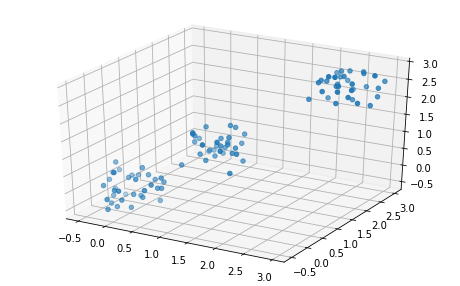

In [51]:
X= -0.5 + np.random.rand(100,3)
X1 = 0.5 + np.random.rand(33,3)
X2 = 2 + np.random.rand(33,3)
X[33:66, :] = X1
X[67:, :] = X2


from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2])

In [0]:
kmeans = KMeans(3)
kmeans.train(X)

In [53]:
kmeans.centroids

array([[-8.37067587e-03,  8.14157596e-02,  8.20878102e-04],
       [ 2.48077027e+00,  2.53459418e+00,  2.44018103e+00],
       [ 9.97370193e-01,  1.07463989e+00,  1.00277423e+00]])

In [54]:
classes = kmeans.predict(X)
classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

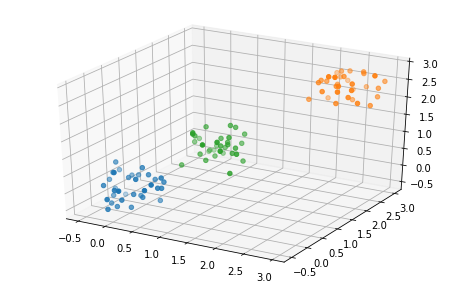

In [55]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[classes == 0,0],X[classes == 0,1],X[classes == 0,2])
ax.scatter(X[classes == 1,0],X[classes == 1,1],X[classes == 1,2])
ax.scatter(X[classes == 2,0],X[classes == 2,1],X[classes == 2,2])